In [220]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots and visualizations

# Load the dataset from CSV file containing cancer and CHD data
dst = pd.read_csv("30-70cancerChdEtc.csv")
# Display the first 5 rows of the dataset to inspect its structure
dst.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9


In [ ]:
# Check the number of missing values in each column of the DataFrame 'dst'
dst.isnull().sum()

In [226]:
# Fill missing values in the 'dst' dataframe with the mean of each column
# Note: dst.mean should be dst.mean() to call the function rather than reference it
dst = dst.fillna(dst.mean)
dst

In [232]:
# Rename columns in the dataframe 'dst' for better readability:
# - Change "Dim1" to "Sex" which better describes the data content
# - Change "First Tooltip" to "Values" for a more generic column name
dst = dst.rename(columns = {"Dim1": "Sex", "First Tooltip": "Values"})
dst

,Location,Period,Indicator,Sex,Values
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9
...,...,...,...,...,...
2740,Zimbabwe,2005,Probability (%) of dying between age 30 and ex...,Male,22.1
2741,Zimbabwe,2005,Probability (%) of dying between age 30 and ex...,Female,22.9
2742,Zimbabwe,2000,Probability (%) of dying between age 30 and ex...,Both sexes,21.6
2743,Zimbabwe,2000,Probability (%) of dying between age 30 and ex...,Male,21.6


In [152]:
dst["Values"] = pd.to_numeric(dst["Values"], errors="coerce")  

# Filter rows where Values < 10
filtered_data = dst[~(dst["Values"] < 10)]
filtered_data

,Location,Period,Indicator,Sex,Values
0,Afghanistan,1970-01-01 00:00:00.000002016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,1970-01-01 00:00:00.000002016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,1970-01-01 00:00:00.000002016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,1970-01-01 00:00:00.000002015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,1970-01-01 00:00:00.000002015,Probability (%) of dying between age 30 and ex...,Male,31.9
...,...,...,...,...,...
2740,Zimbabwe,1970-01-01 00:00:00.000002005,Probability (%) of dying between age 30 and ex...,Male,22.1
2741,Zimbabwe,1970-01-01 00:00:00.000002005,Probability (%) of dying between age 30 and ex...,Female,22.9
2742,Zimbabwe,1970-01-01 00:00:00.000002000,Probability (%) of dying between age 30 and ex...,Both sexes,21.6
2743,Zimbabwe,1970-01-01 00:00:00.000002000,Probability (%) of dying between age 30 and ex...,Male,21.6


Text(0.5, 1.0, 'Probability Distribution')

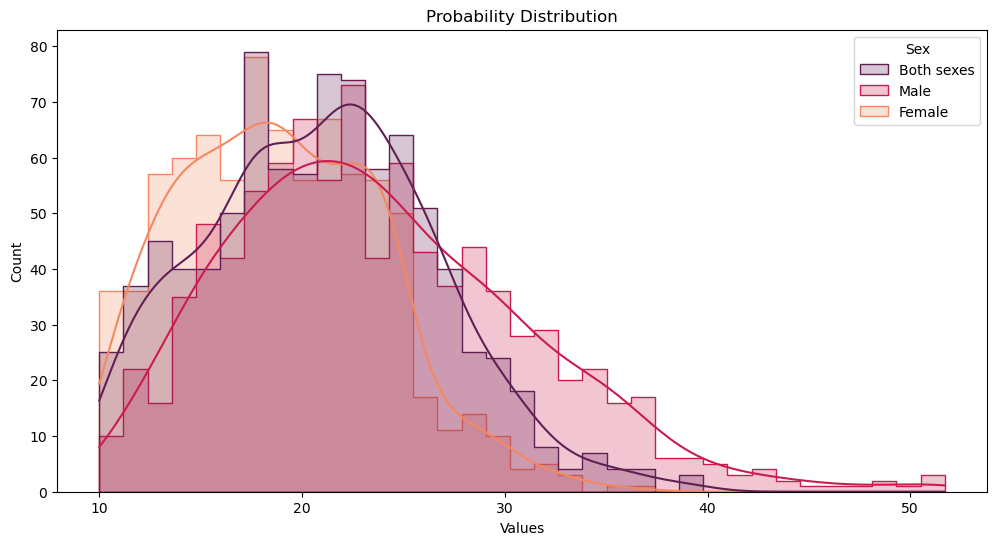

In [166]:
# Create a histogram plot with kernel density estimate
plt.figure(figsize =(12,6))
sns.histplot(data=filtered_data, x='Values', hue='Sex', 
             element='step', kde=True, palette='rocket')

# Add a title to the plot
plt.title('Probability Distribution')

Text(0, 0.5, 'Probability (%)')

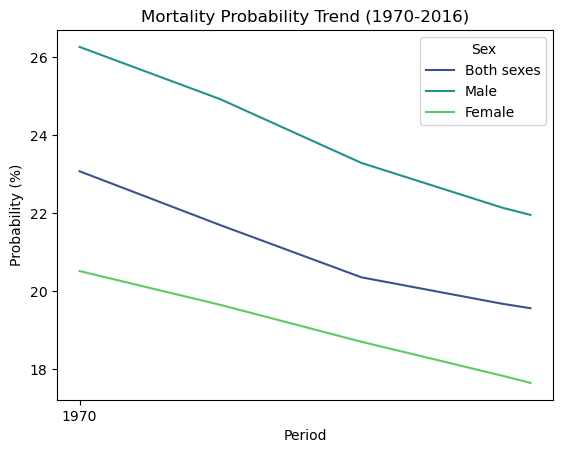

In [184]:
# Create a line plot showing mortality probability trends over time
sns.lineplot(data=filtered_data, x='Period', y='Values', hue='Sex', 
             estimator='mean', errorbar=None, palette='viridis')
plt.title('Mortality Probability Trend (1970-2016)')
plt.ylabel('Probability (%)')

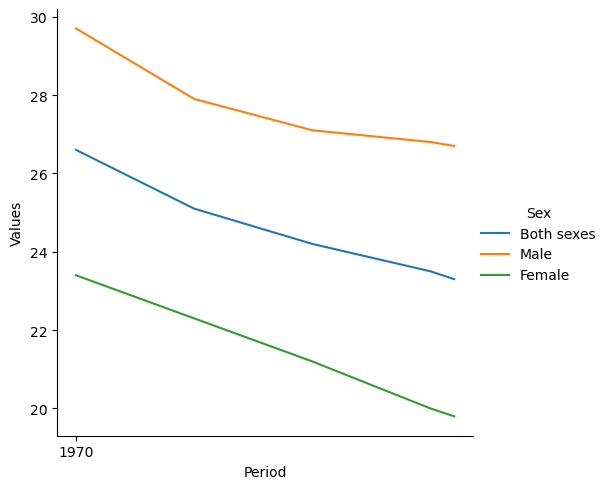

In [204]:
# Create a line plot showing values over time for India
sns.relplot(data=filtered_data[filtered_data['Location']=='India'], 
            x='Period', y='Values', hue='Sex', kind='line')

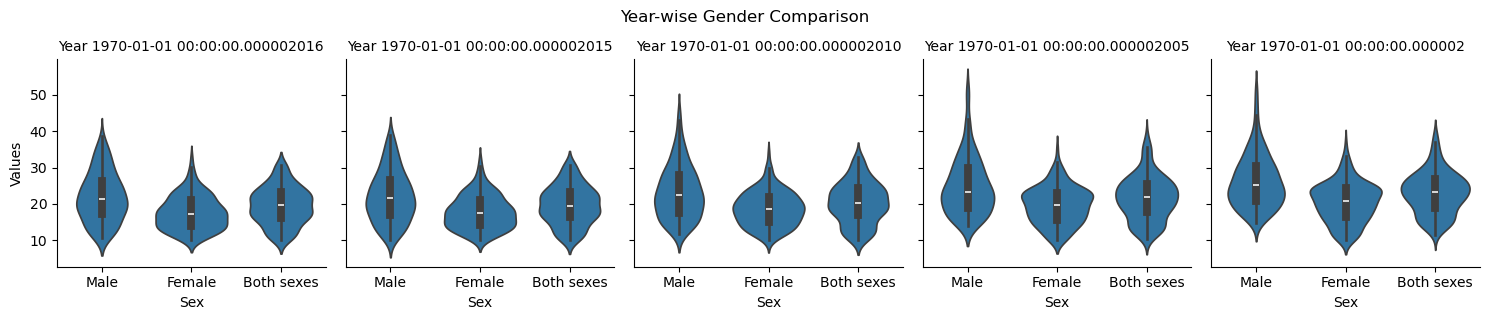

In [218]:
# Create a grid of subplots with one column per time period, 5 columns per row, each subplot 3 inches high
g = sns.FacetGrid(data=filtered_data, col='Period', col_wrap=5, height=3)

# Create violin plots in each subplot showing distribution of 'Values' by 'Sex', ensuring consistent ordering
g.map(sns.violinplot, 'Sex', 'Values', order=['Male', 'Female', 'Both sexes'])
g.set_titles("Year {col_name}")
g.fig.suptitle('Year-wise Gender Comparison', y=1.05)
plt.show()